# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat'] # YOUR CODE HERE
        city_lng = city_weather['coord']['lon'] # YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max'] # YOUR CODE HERE
        city_humidity = city_weather['main']['humidity'] # YOUR CODE HERE
        city_clouds = city_weather['clouds']['all'] # YOUR CODE HERE
        city_wind = city_weather['wind']['speed'] # YOUR CODE HERE
        city_country = city_weather['sys']['country'] # YOUR CODE HERE
        city_date = city_weather['dt'] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | polyarnyye zori
Processing Record 4 of Set 1 | fomboni
Processing Record 5 of Set 1 | dalbandin
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | calama
Processing Record 10 of Set 1 | ulladulla
Processing Record 11 of Set 1 | port saint john's
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | prado
Processing Record 19 of Set 1 | jagraon
Processing Record 20 of Set 1 | acarau
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | kristiansund
Processing Record 23 of Set 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,14.29,69,92,0.45,AU,1733692857
1,ancud,-41.8697,-73.8203,13.17,61,98,4.32,CL,1733692858
2,polyarnyye zori,67.3661,32.4981,-3.52,94,100,3.42,RU,1733692859
3,fomboni,-12.2800,43.7425,27.86,71,13,0.90,KM,1733692861
4,dalbandin,28.8947,64.4101,5.31,27,1,2.45,PK,1733692834


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,14.29,69,92,0.45,AU,1733692857
1,ancud,-41.8697,-73.8203,13.17,61,98,4.32,CL,1733692858
2,polyarnyye zori,67.3661,32.4981,-3.52,94,100,3.42,RU,1733692859
3,fomboni,-12.2800,43.7425,27.86,71,13,0.90,KM,1733692861
4,dalbandin,28.8947,64.4101,5.31,27,1,2.45,PK,1733692834


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [13]:
# Import datetime
from datetime import date

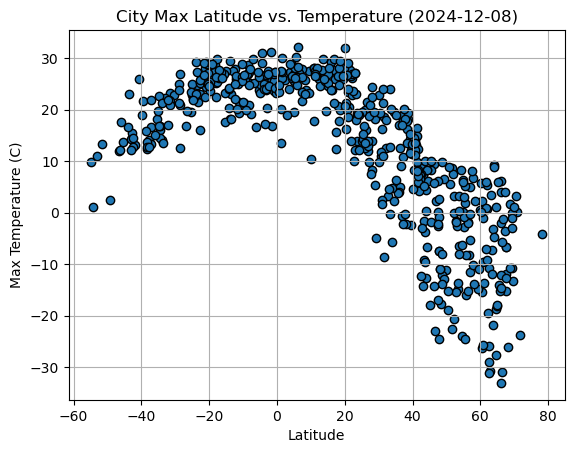

In [16]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties (labels, title, and grid)
plt.title(f'City Max Latitude vs. Temperature ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

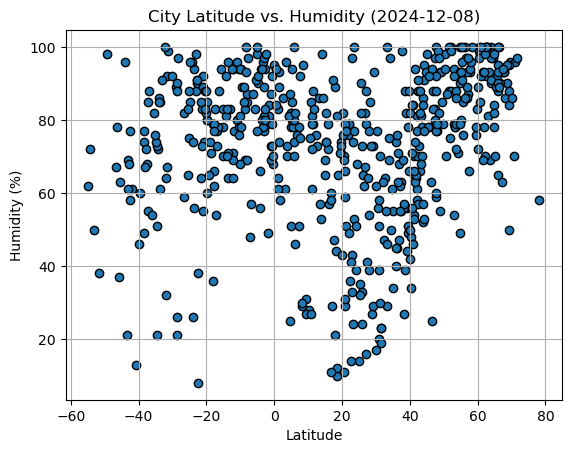

In [17]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

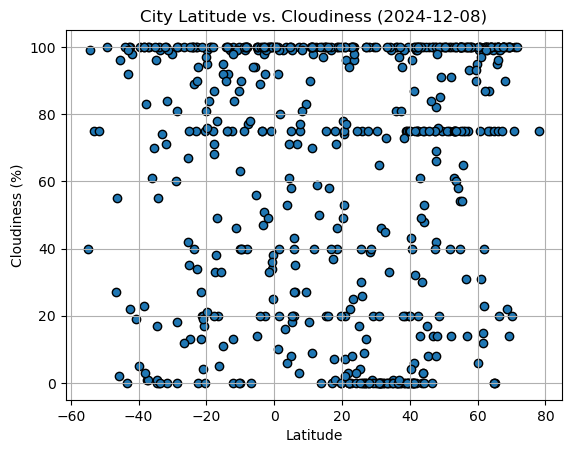

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

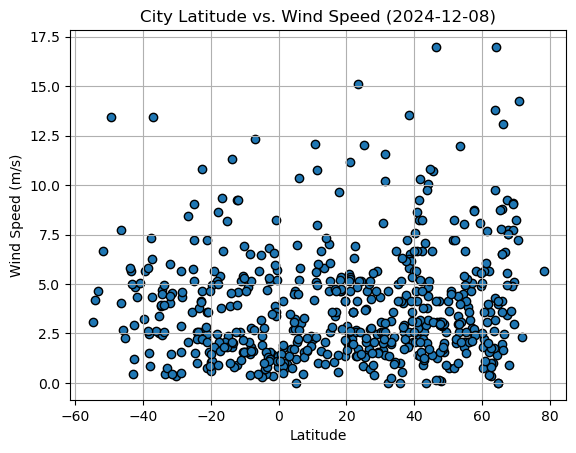

In [19]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values, y_values, title, x_label, y_label):

#Linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"The r^2-value is: {r_value**2}")

    # Ploting data points and the linear regression model
    plt.scatter(x_values, y_values, label='Data Points')
    plt.plot(x_values, x_values * slope + intercept, 'r-', label='Fitted Line')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Format the equation string: y = mx + b
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Display the equation on the plot
    plt.annotate(line_eq, xy=(0.05, 0.05), xycoords='axes fraction', fontsize=15, color='red')

    # Show the plot
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,polyarnyye zori,67.3661,32.4981,-3.52,94,100,3.42,RU,1733692859
4,dalbandin,28.8947,64.4101,5.31,27,1,2.45,PK,1733692834
5,sitka,57.0531,-135.3300,4.94,87,75,2.57,US,1733692863
12,kodiak,57.7900,-152.4072,6.73,93,100,8.75,US,1733692871
15,vorgashor,67.5833,63.9500,-11.94,94,100,7.71,RU,1733692874


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,14.29,69,92,0.45,AU,1733692857
1,ancud,-41.8697,-73.8203,13.17,61,98,4.32,CL,1733692858
3,fomboni,-12.2800,43.7425,27.86,71,13,0.90,KM,1733692861
6,grytviken,-54.2811,-36.5092,1.11,72,99,4.21,GS,1733692864
7,adamstown,-25.0660,-130.1015,22.90,75,35,9.03,PN,1733692865


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6802554684175348


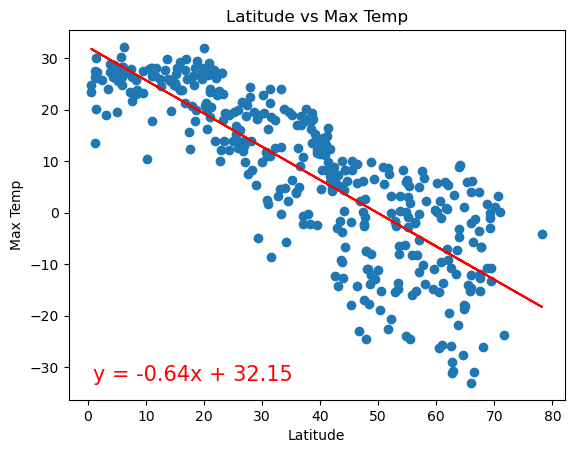

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Latitude vs Max Temp"
x_label = "Latitude"
y_label = "Max Temp"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

The r^2-value is: 0.4717271016813188


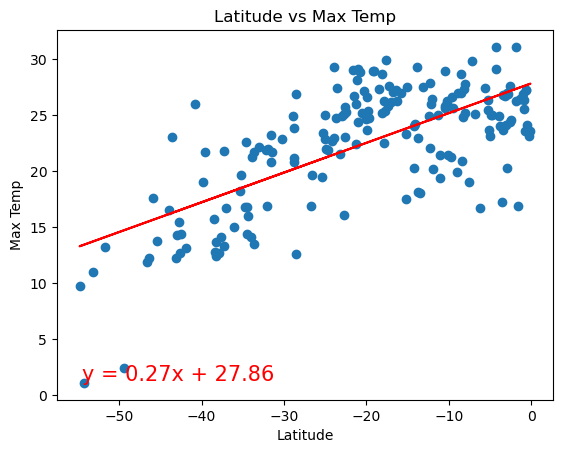

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Latitude vs Max Temp"
x_label = "Latitude"
y_label = "Max Temp"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

**Discussion about the linear relationship:** 

Northern Hemisphere: There is a strong correlation between latitude and maximum temperature, showne by r^2 value of 0.6802. In the Northern Hemisphere, the maximum temperature decreases by 0.64°C per degree of latitude increase, it meanes as we move further to north and away from the equator it gets colder.

Southern Hemisphere: The correlation is weaker compared to the Northern Hemisphere. There is a moderate correlation between latitude and maximum temperature, indicated by an r^2 value of 0.4717. In the Southern Hemisphere, the maximum temperature increases by 0.27°C per degree of latitude increase, it meanes as we move to south, and away from the equator it gets colder. In an other word, it shows that temperatures rise as we move towards the equator.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.15149513515995786


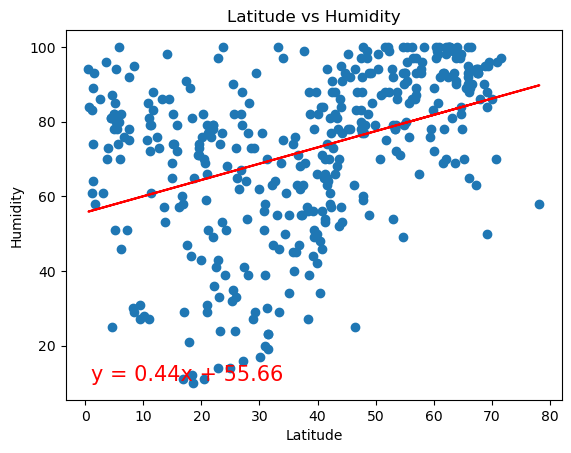

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "Latitude vs Humidity"
x_label = "Latitude"
y_label = "Humidity"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

The r^2-value is: 0.11939780381752446


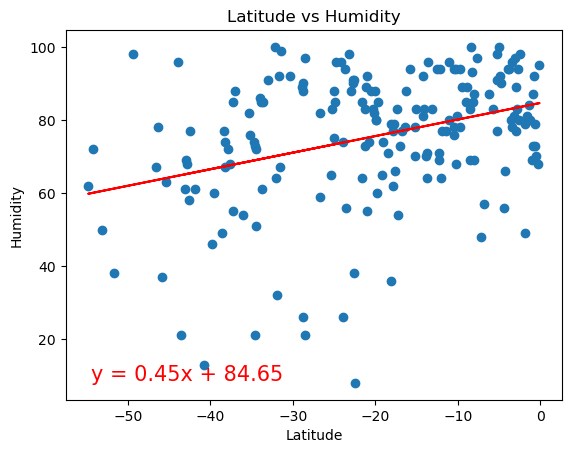

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = "Latitude vs Humidity"
x_label = "Latitude"
y_label = "Humidity"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

**Discussion about the linear relationship:** 
The r^2 values obtained from linear regressions for the Northern and Southern Hemispheres are 0.1514 and 0.1193, respectively. we can see that both values are close to 0, which indicates that there is a very weak, almost negligible correlation between latitude and humidity in both hemispheres. Positive r values suggest a positive correlation, but the low magnitudes in this case imply that the correlation is not very significant.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.04547890863685858


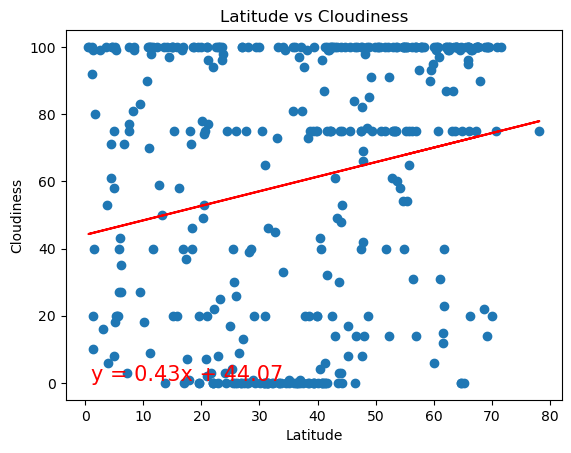

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = "Latitude vs Cloudiness"
x_label = "Latitude"
y_label = "Cloudiness"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

The r^2-value is: 0.015036561488794566


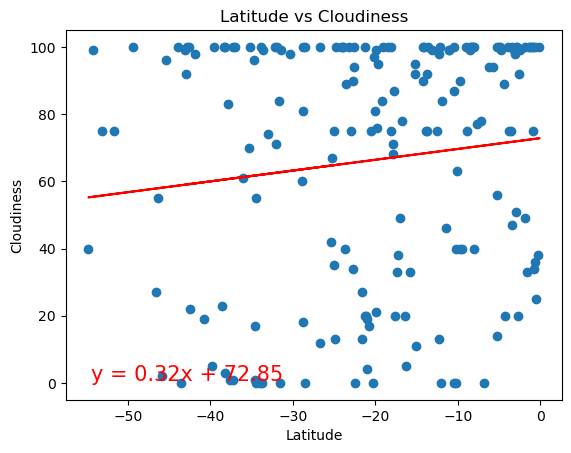

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = "Latitude vs Cloudiness"
x_label = "Latitude"
y_label = "Cloudiness"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

**Discussion about the linear relationship:** 
Given the r values of 0.0454 for the Northern Hemisphere and 0.0150 for the Southern Hemisphere, we can observe that both values are close to 0. This indicates that there is a very weak, almost negligible correlation between latitude and cloudiness in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.029436467418956027


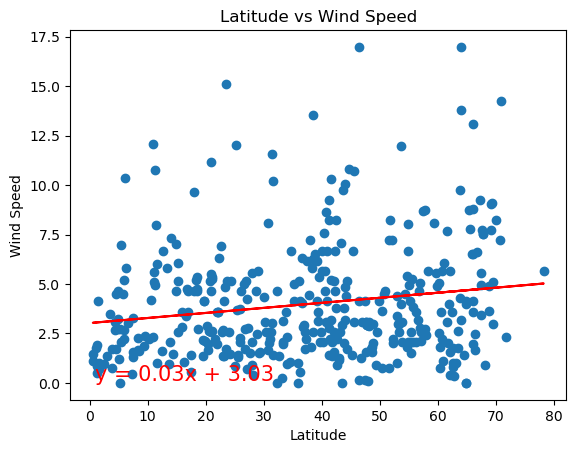

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = "Latitude vs Wind Speed"
x_label = "Latitude"
y_label = "Wind Speed"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

The r^2-value is: 0.02473181231891826


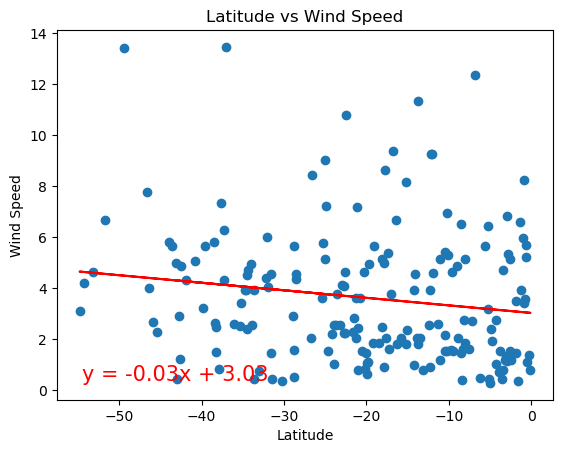

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = "Latitude vs Wind Speed"
x_label = "Latitude"
y_label = "Wind Speed"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

**Discussion about the linear relationship:** 
Given the r values of 0.0294 for the Northern Hemisphere and 0.0247 for the Southern Hemisphere, we can see that both values are close to 0. This suggests that there is a very weak, almost negligible correlation between latitude and wind speed in both hemispheres.